In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
county = "Dallas"
state = "Texas"
state_abb = "TX"
FIPS = "48113"

# Read the csv files

Read the csv files.  
Convert the FIPS column to Strings with 0 in front if it's not 5 digits long.

US Confirmed Case Count  
COVID-19 data from John Hopkins University

In [3]:
# Helper function to convert FIPS into a string
def convert_to_zip_code(value):
    if np.isnan(value):
        return ""
    else:
        return str(int(value)).zfill(5)

us_confirmed_cases = pd.read_csv("../data/RAW_us_confirmed_cases.csv")
# Convert FIPS into a String Zip
us_confirmed_cases['FIPS'] = us_confirmed_cases['FIPS'].apply(convert_to_zip_code)
us_confirmed_cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,Alabama,Autauga,84001001,US,USA,840,01001,US,32.539527,-86.644082,...,9901,9904,9909,9910,9954,9967,10043,10047,10048,10061
1,Alabama,Baldwin,84001003,US,USA,840,01003,US,30.727750,-87.722071,...,37087,37098,37127,37167,37192,37224,37245,37258,37266,37285
2,Alabama,Barbour,84001005,US,USA,840,01005,US,31.868263,-85.387129,...,3556,3560,3563,3565,3566,3575,3577,3578,3578,3583
3,Alabama,Bibb,84001007,US,USA,840,01007,US,32.996421,-87.125115,...,4217,4217,4232,4236,4240,4246,4251,4252,4253,4256
4,Alabama,Blount,84001009,US,USA,840,01009,US,33.982109,-86.567906,...,10102,10104,10113,10132,10162,10179,10192,10197,10207,10227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039,US,43.935225,-110.589080,...,5050,5075,5083,5098,5110,5119,5119,5119,5152,5164
3338,Wyoming,Uinta,84056041,US,USA,840,56041,US,41.287818,-110.547578,...,3711,3719,3733,3744,3756,3781,3781,3781,3794,3805
3339,Wyoming,Unassigned,84090056,US,USA,840,90056,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043,US,43.904516,-107.680187,...,1586,1603,1631,1645,1657,1677,1677,1677,1690,1700


Mask Mandates data from CDC  
U.S. State and Territorial Public Mask Mandates From April 10, 2020 through August 15, 2021 by County by Day

In [4]:
mask_mandates = pd.read_csv("../data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")
mask_mandates

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,TX,Anderson County,48,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,TX,Anderson County,48,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,TX,Anderson County,48,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,TX,Anderson County,48,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,TX,Anderson County,48,1,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
125217,TX,Zavala County,48,507,8/11/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
125218,TX,Zavala County,48,507,8/12/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
125219,TX,Zavala County,48,507,8/13/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
125220,TX,Zavala County,48,507,8/14/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"


Mask use survey from NY Times.  
Survey taken July 2 to July 14 of 2020.

In [5]:
mask_use = pd.read_csv("../data/mask-use-by-county.csv")
# Convert the COUNTYFP into a string and add 0 in front if not 5 digits
mask_use['COUNTYFP'] = mask_use['COUNTYFP'].astype(str).str.zfill(5)
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,01001,0.053,0.074,0.134,0.295,0.444
1,01003,0.083,0.059,0.098,0.323,0.436
2,01005,0.067,0.121,0.120,0.201,0.491
3,01007,0.020,0.034,0.096,0.278,0.572
4,01009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


# Filter the DataFrames to the specific state and county

In [6]:
us_confirmed_cases_dallas = us_confirmed_cases[(us_confirmed_cases['Admin2'] == 'Dallas') & (us_confirmed_cases['Province_State'] == 'Texas')].reset_index(drop=True)
us_confirmed_cases_dallas

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,...,398928,399401,400449,401005,401467,402023,402023,402023,402626,403180


In [7]:
mask_mandates_dallas = mask_mandates[mask_mandates['County_Name'] == 'Dallas County'].reset_index(drop=True)
mask_mandates_dallas.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,TX,Dallas County,48,113,5/7/2020,2,NaN,NaN,NaN,NaN
1,TX,Dallas County,48,113,5/8/2020,2,NaN,NaN,NaN,NaN
2,TX,Dallas County,48,113,5/9/2020,2,NaN,NaN,NaN,NaN
3,TX,Dallas County,48,113,5/10/2020,2,NaN,NaN,NaN,NaN
4,TX,Dallas County,48,113,5/11/2020,2,NaN,NaN,NaN,NaN


In [8]:
mask_use_dallas = mask_use[mask_use['COUNTYFP'] == FIPS].reset_index(drop=True)
mask_use_dallas.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,48113,0.024,0.019,0.059,0.141,0.757


# Transform the confirmed cases by melt
Convert each date column into a single date column and a value column as the new confirmed cases from the date

In [9]:
id_vars = [
    'Province_State',
    'Admin2',
    'UID',
    'iso2',
    'iso3',
    'code3',
    'FIPS',
    'Country_Region',
    'Lat',
    'Long_',
    'Combined_Key'
]

us_confirmed_cases_dallas_melt = pd.melt(us_confirmed_cases_dallas, id_vars=id_vars, var_name="Date", value_name="Confirmed_Cases")
us_confirmed_cases_dallas_melt.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",1/22/20,0
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",1/23/20,0
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",1/24/20,0
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",1/25/20,0
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",1/26/20,0


# Merge us confirmed cases dataframe and mask mandates

Convert the Date columns from Strings to datetime objects  

In [10]:
us_confirmed_cases_dallas_melt['Date'] = pd.to_datetime(us_confirmed_cases_dallas_melt['Date'])

In [11]:
mask_mandates_dallas['date'] = pd.to_datetime(mask_mandates_dallas['date'])

Merge the two dataframes on the date columns and drop redundant columns

In [12]:
dallas_case_and_mandates = us_confirmed_cases_dallas_melt.merge(mask_mandates_dallas, left_on='Date', right_on='date', how='outer')
dallas_case_and_mandates.drop(columns=['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County', 'date'], inplace=True)
dallas_case_and_mandates.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-22,0,NaN,NaN,NaN,NaN,NaN
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-23,0,NaN,NaN,NaN,NaN,NaN
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-24,0,NaN,NaN,NaN,NaN,NaN
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-25,0,NaN,NaN,NaN,NaN,NaN
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-26,0,NaN,NaN,NaN,NaN,NaN


# Analysis

### Caveats
- I am assuming nan is no for the mask mandates in the cdc data set  
- The cdc mask mandates data set only goes up to August, 15 2021. Because there is no data, we will be assuming there are no more mask mandates after August 15, 2021, which may not be true.
- I noticed that the new case count is recorded after 2 day break weekly, which is typically Saturday and Sunday. This also results in a huge number spike on Monday to make up for the 0 counts of the previous two days.
- Mask wearing survey from NY Times was taken July 2 to July 14 of 2020.

The Mask Mandates has three values: nan, yes, no. After doing some reading of the cdc sources, I am going to assume nan means there are no mandates. Therefore I am going to convert nan values to no.

In [13]:
dallas_case_and_mandates['Face_Masks_Required_in_Public'].fillna("No", inplace=True)

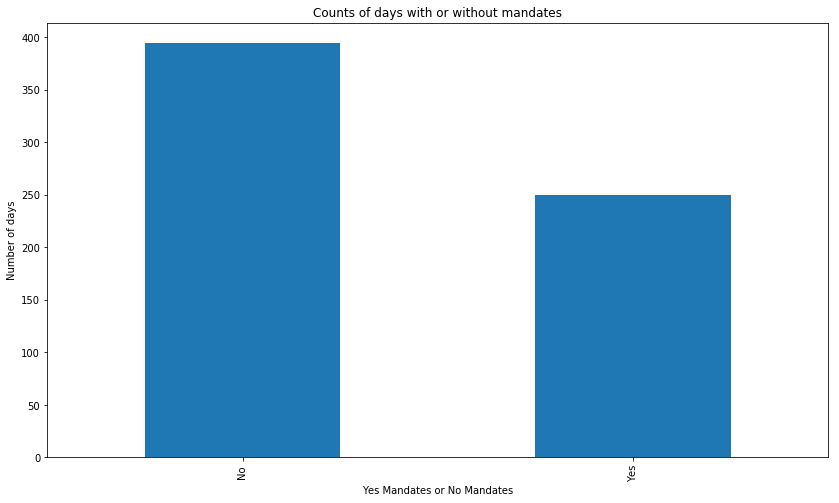

In [14]:
ax = dallas_case_and_mandates['Face_Masks_Required_in_Public'].value_counts(dropna=False).plot(kind='bar', figsize=(14,8))
ax.set_title("Counts of days with or without mandates")
ax.set_xlabel("Yes Mandates or No Mandates")
ax.set_ylabel("Number of days")

plt.show()

There seems to be more days of no mandates than days with mandates

#### Plot the confirmed cases as a time series

In [15]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.scatterplot(data=dallas_case_and_mandates, x='Date', y='Confirmed_Cases', hue='Face_Masks_Required_in_Public', ax=ax)
# ax.set_title("Covid Confirmed Cases by Date")
# ax.set_xlabel("Date")
# ax.set_ylabel("Covid Confirmed Cases")

# plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


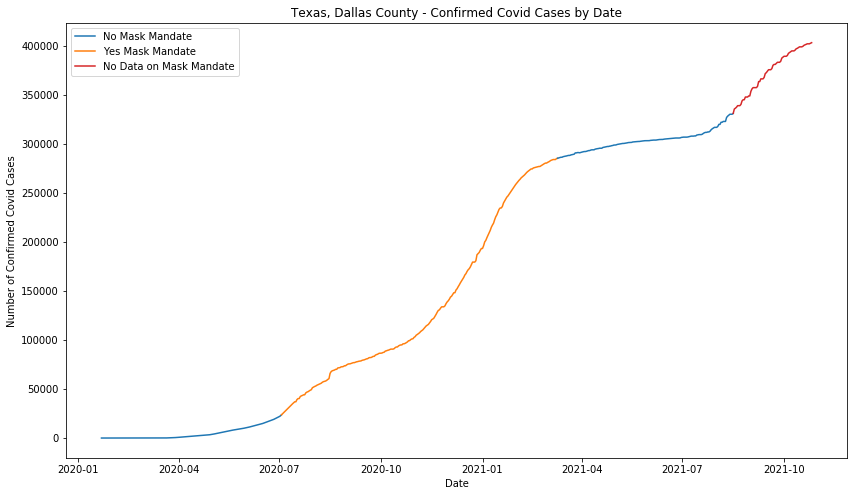

In [16]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates['Date'][:163+1], dallas_case_and_mandates['Confirmed_Cases'][:163+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][163:413+1], dallas_case_and_mandates['Confirmed_Cases'][163:413+1], color='C1')
ax.plot(dallas_case_and_mandates['Date'][413:572+1], dallas_case_and_mandates['Confirmed_Cases'][413:572+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['Confirmed_Cases'][572:], color='C3')
line0 = Line2D([0], [0], label='No Mask Mandate', color='C0')
line1 = Line2D([0], [0], label='Yes Mask Mandate', color='C1')
line2 = Line2D([0], [0], label='No Data on Mask Mandate', color='C3')
plt.legend(handles=[line0,line1,line2])
ax.set_title("Texas, Dallas County - Confirmed Covid Cases by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed Covid Cases")

plt.show()

It seems like there is a mask mandate in the worst part of the covid period.  
#### I'm going to use daily increase instead of total case count instead.  
First I need to get the daily covid case value

In [17]:
dallas_case_and_mandates['New_Cases'] = dallas_case_and_mandates['Confirmed_Cases'].diff()
dallas_case_and_mandates.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-22,0,NaN,No,NaN,NaN,NaN,NaN
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-23,0,NaN,No,NaN,NaN,NaN,0.0
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-24,0,NaN,No,NaN,NaN,NaN,0.0
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-25,0,NaN,No,NaN,NaN,NaN,0.0
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-26,0,NaN,No,NaN,NaN,NaN,0.0


In [18]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.scatterplot(data=dallas_case_and_mandates, x='Date', y='New_Cases', hue='Face_Masks_Required_in_Public', ax=ax)
# ax.set_title("Covid Confirmed Cases by Date")
# ax.set_xlabel("Date")
# ax.set_ylabel("Covid Confirmed Cases")

# plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


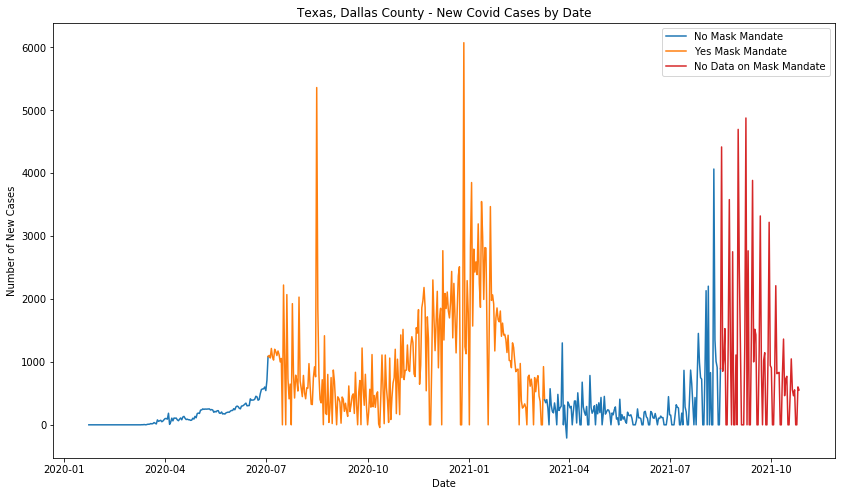

In [19]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates['Date'][:163+1], dallas_case_and_mandates['New_Cases'][:163+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][163:413+1], dallas_case_and_mandates['New_Cases'][163:413+1], color='C1')
ax.plot(dallas_case_and_mandates['Date'][413:572+1], dallas_case_and_mandates['New_Cases'][413:572+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['New_Cases'][572:], color='C3')
line0 = Line2D([0], [0], label='No Mask Mandate', color='C0')
line1 = Line2D([0], [0], label='Yes Mask Mandate', color='C1')
line2 = Line2D([0], [0], label='No Data on Mask Mandate', color='C3')
plt.legend(handles=[line0,line1,line2])
ax.set_title("Texas, Dallas County - New Covid Cases by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Cases")

plt.show()

After plotting this plot, I noticed there were a lot of 0 new cases and I decided to investigate further. After inspection, I noticed that the new case count is recorded after 2 day break, which is typically Saturday and Sunday. This also results in a huge number spike on Monday to make up for the 0 counts of the previous two days.

#### Analyze the covid case counts by day of week  
Extract day of week from the Date column

In [20]:
dallas_case_and_mandates['Day_Of_Week'] = dallas_case_and_mandates['Date'].dt.day_name()
dallas_case_and_mandates.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases,Day_Of_Week
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-22,0,NaN,No,NaN,NaN,NaN,NaN,Wednesday
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-23,0,NaN,No,NaN,NaN,NaN,0.0,Thursday
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-24,0,NaN,No,NaN,NaN,NaN,0.0,Friday
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-25,0,NaN,No,NaN,NaN,NaN,0.0,Saturday
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-01-26,0,NaN,No,NaN,NaN,NaN,0.0,Sunday


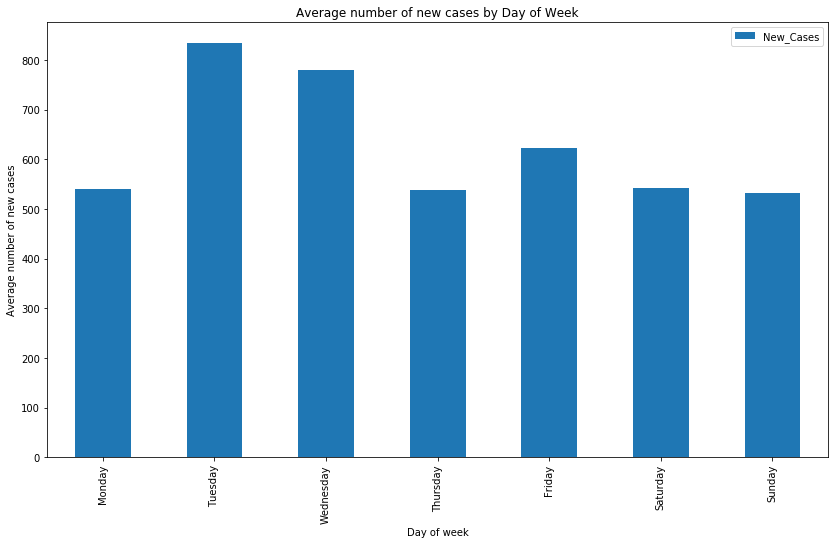

In [21]:
ax = dallas_case_and_mandates.groupby('Day_Of_Week').agg({'New_Cases':'mean'}).reindex([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(14,8))
ax.set_title("Average number of new cases by Day of Week")
ax.set_xlabel("Day of week")
ax.set_ylabel("Average number of new cases")

plt.show()

It is quite often found that Saturday, Sunday, and Monday do are the days with breaks (values with 0). Then the days that have a spike value due to the previous missing values are usually Monday and Tuesday. Due to Monday also have missing values, the average is roughly the same as Saturday and Sunday. The average for Tuesday is significantly higher and that is due to spike values from the previous empty two days and also because Tuesday is not a day that has been taken off before.

#### It is likely new confirmed cases have a delay. Currently my plot has no delay. I will now try the same line plot with a 7 days delay.

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


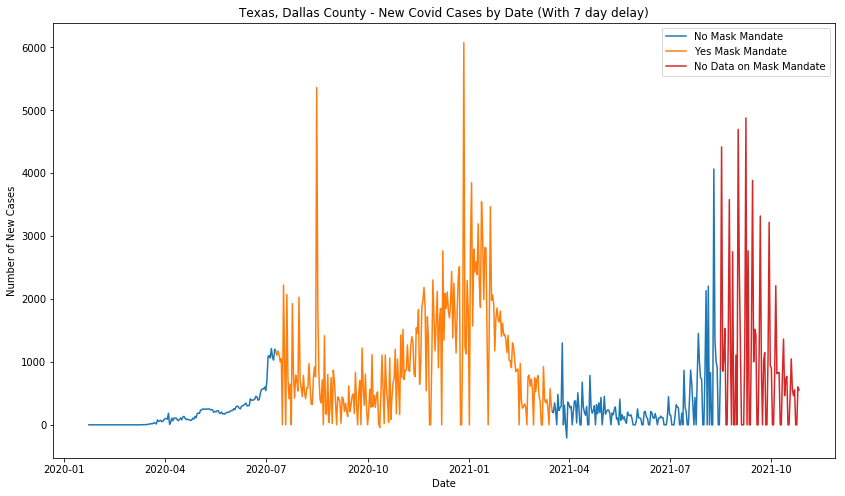

In [22]:
delay = 7

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates['Date'][:163+delay+1], dallas_case_and_mandates['New_Cases'][:163+delay+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][163+delay:413+delay+1], dallas_case_and_mandates['New_Cases'][163+delay:413+delay+1], color='C1')
ax.plot(dallas_case_and_mandates['Date'][413+delay:572+1], dallas_case_and_mandates['New_Cases'][413+delay:572+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['New_Cases'][572:], color='C3')
line0 = Line2D([0], [0], label='No Mask Mandate', color='C0')
line1 = Line2D([0], [0], label='Yes Mask Mandate', color='C1')
line2 = Line2D([0], [0], label='No Data on Mask Mandate', color='C3')
plt.legend(handles=[line0,line1,line2])
ax.set_title("Texas, Dallas County - New Covid Cases by Date (With 7 day delay)")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Cases")

plt.show()

With the 1 week delay on the plot, the plot looks very similar to as the previous plot. It's a small shift. It looks like the mask mandate was in the worst part of Covid and there were high number of daily new cases. Perhaps, it would be worse without the mask mandate. We do see a spike in covid cases right before the mask mandate though, and that's why the mask mandate was probably put into place. It does look like soon after the mask mandate, there is a slight drop in covid cases before it spikes up really high around December 2020 and Janurary 2021. However, the spike drops very soon. I imagine that drop is due to the mass population receiving vaccinations around that time period. I choose not to comment on the dates after August 2021, as the mask mandates data set does not reach this far, and I'm not sure if there is a mask mandate there or not.

#### Plot confirmed cases around $\pm2$ weeks around July 2 to July 14 of 2020 (around the New York Times survey).

In [23]:
dallas_case_and_mandates_july = dallas_case_and_mandates[(dallas_case_and_mandates['Date'] >= '2020-06-18') & (dallas_case_and_mandates['Date'] <= '2020-07-28')]
dallas_case_and_mandates_july.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases,Day_Of_Week
148,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-06-18,15648,2.0,No,NaN,NaN,NaN,392.0,Thursday
149,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-06-19,16042,2.0,No,NaN,NaN,NaN,394.0,Friday
150,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-06-20,16437,2.0,No,NaN,NaN,NaN,395.0,Saturday
151,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-06-21,16845,2.0,No,NaN,NaN,NaN,408.0,Sunday
152,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.77796,"Dallas, Texas, US",2020-06-22,17299,2.0,No,NaN,NaN,NaN,454.0,Monday


In [24]:
mask_use_dallas.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,48113,0.024,0.019,0.059,0.141,0.757


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


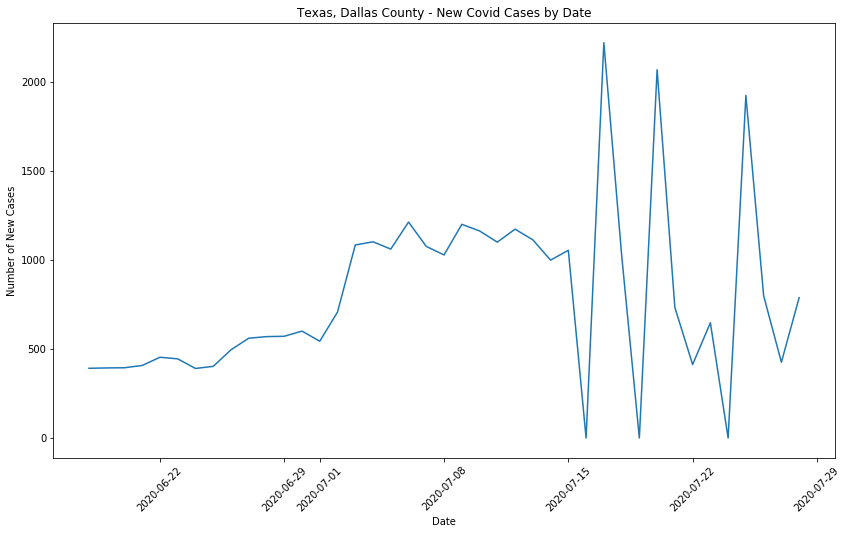

In [25]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates_july['Date'], dallas_case_and_mandates_july['New_Cases'])
ax.xaxis.set_tick_params(rotation=45)
ax.set_title("Texas, Dallas County - New Covid Cases by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Cases")

plt.show()

There seems to be a lot of jumping around near the end of July. The seems to be due to having no reports on one day, and then a makeup day with almost twice the value.  
75% answered Always wear mask
14% answered Frequently wear mask  
75% + 14% = 89% wear masks frequently or more  
Considering that 89% wore masks around the July time period, the covid cases were around 1000 a day. Looking at this plot, it's very hard to say if there was any impact of masks and new covid cases.